In [1]:
%matplotlib inline
import torch
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
from IPython import display
import Ipynb_importer
from torch.utils.data import DataLoader
import cnn
import numpy as np
from jupyterthemes import jtplot

importing Jupyter notebook from cnn.ipynb
CNN(
  (layer1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (layer2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer3): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (layer4): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, d

In [2]:
model_path = './model.pth'
model = torch.load(model_path)

In [3]:
data_tf = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize([0.5], [0.5])])

test_dataset = datasets.MNIST(root='./data', train=False, transform=data_tf)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

In [4]:
def get_labels(labels):
    text_labels = ['0', '1', '2', '3', '4',
                   '5', '6', '7', '8', '9']
    return [text_labels[int(i)] for i in labels]

In [5]:
X, y = iter(test_loader).next()
if torch.cuda.is_available():
    X = X.cuda()
    y = y.cuda()
true_label = get_labels(y.cpu().numpy())
pre_label = get_labels(model(X).argmax(dim = 1).cpu().numpy())
titles = ['TRUE NUMBER : '+ true + '\n' + 'PRED NUMBER : ' + pre   for true, pre in zip(true_label, pre_label)]

In [6]:
def show_mnist(images, labels):
    display.set_matplotlib_formats('svg')
    _, figs = plt.subplots(len(images), 1, figsize = (140, 140))
    for f, img, lbl in zip(figs, images, labels):
        f.imshow(img.view((28, 28)).numpy())
        f.set_title(lbl)
        f.axes.get_xaxis().set_visible(False)
        f.axes.get_yaxis().set_visible(False)
    plt.show()

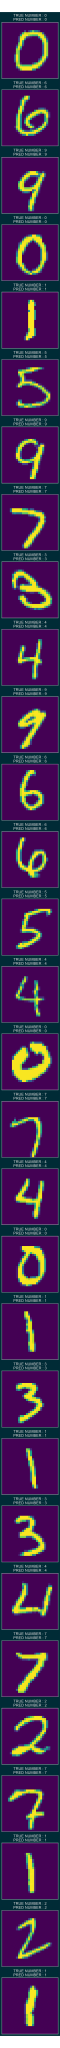

In [7]:
jtplot.style(theme = 'solarizedd')
show_mnist(X.cpu()[10:40], titles[10:40])